Dataset saved successfully.


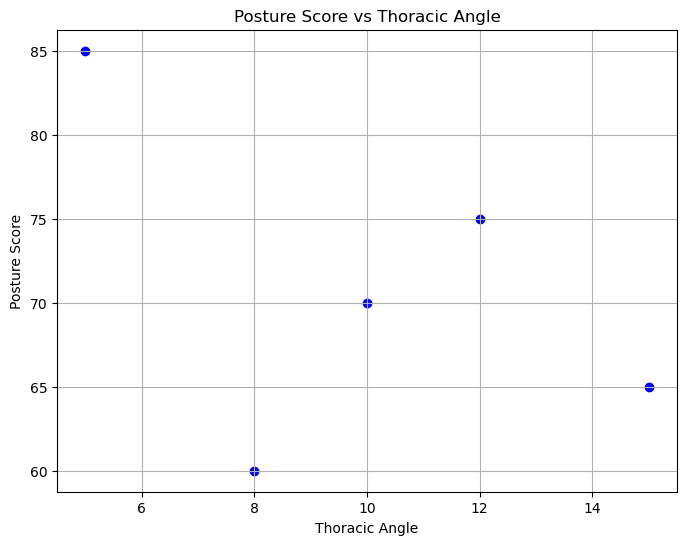

Mean Squared Error: 417.1884607145433


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

ideal_cervical_angle =  20
ideal_thoracic_angle = 8

data = {
    'age': [25, 30, 35, 40, 45],
    'cervical_angle': [15, 20, 10, 25, 30],  # Example cervical angles
    'thoracic_angle': [5, 10, 8, 12, 15],    # Example thoracic angles
    'position': ['sitting', 'standing', 'sitting', 'standing', 'standing'],
    'posture_score': [85, 70, 60, 75, 65]   # Example posture scores
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('your_dataset.csv', index=False)

print("Dataset saved successfully.")
# Load your dataset
df = pd.read_csv('your_dataset.csv')

# Simple feature engineering
df['position'] = df['position'].map({'sitting': 0, 'standing': 1})  # Encode position
df['cervical_deviation'] = abs(df['cervical_angle'] - ideal_cervical_angle)  # Ideal angles are hypothetical
df['thoracic_deviation'] = abs(df['thoracic_angle'] - ideal_thoracic_angle)

#plotting data
plt.figure(figsize=(8, 6))
plt.scatter(df['thoracic_angle'], df['posture_score'], color='blue')
plt.title('Posture Score vs Thoracic Angle')
plt.xlabel('Thoracic Angle')
plt.ylabel('Posture Score')
plt.grid(True)
plt.show()
# Select features and target
X = df[['age', 'cervical_deviation', 'thoracic_deviation', 'position']]
y = df['posture_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Feedback generation (simplified example)
#def generate_feedback(score):
#    if score > 80:
 #       return "Your posture is excellent!"
  #  elif score > 60:
  #      return "Your posture needs some improvement."
#   else:
 #       return "Your posture is poor; let's work on it!"

# Example usage
#test_score = 75  # This would come from the model in a real scenario
#feedback = generate_feedback(test_score)
#print(feedback)